Below is a preview of a couple columns we'll work with from the dete_survey.csv:

    ID: An id used to identify the participant of the survey
    SeparationType: The reason why the person's employment ended
    Cease Date: The year or month the person's employment ended
    DETE Start Date: The year the person began employment with the DETE
        
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

    Record ID: An id used to identify the participant of the survey
    Reason for ceasing employment: The reason why the person's employment ended
    LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

<b>The questions that we are trying to investigate are:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?</b>

In [1]:
import numpy as np
import pandas as pd

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey = pd.read_csv("tafe_survey.csv")
tafe_survey

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [7]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
08/2012         2
04/2013         2
04/2014         2
07/2014         2
02/2014         2
07/2006         1
09/2014         1
2010            1
07/2012         1
11/2012         1
09/2010         1
2014            1
Name: Cease Date, dtype: int64

In [8]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

In [9]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
1975          21
1970          21
2013          21
2005          20
1990          20
1996          19
1999          19
2000          18
1992          18
2004          18
1991          18
1989          17
1976          15
2002          15
1978          15
2003          15
1988          15
1995          14
1974          14
1997          14
1980          14
1998          14
1979          14
1993          13
1986          12
1972          12
1977          11
2001          10
1984          10
1994          10
1971          10
1969          10
1983           9
1981           9
1985           8
1973           8
1987           7
1982           4
1963           4
1968           3
1967           2
1965           1
1966           1
Name: DETE Start Date, dtype: int64

The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.

Each dataframe contains many of the same columns, but the column names are different.

There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [10]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='NaN')

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:94], axis=1)

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [13]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 28 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [14]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

Now that the data sets have been trimmed to remove unnecessary fields, I will rename the columns.

In [15]:
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above'],
      dtype='object')


In [16]:
dete_survey_updated = dete_survey_updated.rename({'ID': 'id', 'SeparationType':'separation_type', 'Cease Date':'cease_date',
        'DETE Start Date':'dete_start_date', 'Role Start Date':'role_start_date', 'Position':'position',
        'Classification':'classification', 'Region':'region',
       'Business Unit':'business_unit', 'Employment Status':'employment_status', 
        'Career move to public sector':'career_move_to_public_sector', 
        'Career move to private sector':'career_move_to_private_sector',
        'Interpersonal conflicts':'interpersonal_conflicts', 'Job dissatisfaction':'job_dissatisfaction',
        'Dissatisfaction with the department':'dissatisfaction_with_the_department',
       'Physical work environment':'physical_work_environment', 'Lack of recognition':'lack_of_recognition',
       'Lack of job security':'lack_of_job_security', 'Work location':'work_location', 
        'Employment conditions':'employment_conditions', 'Maternity/family':'maternity_family',
        'Relocation':'relocation', 'Study/Travel':'study_travel', 'Ill Health':'ill_health',
       'Traumatic incident':'traumatic_incident', 'Work life balance':'work_life_balance', 
        'Workload':'worklad','None of the above':'none_of_the_above'}, axis='columns')

In [17]:
print(dete_survey_updated.columns)

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'worklad',
       'none_of_the_above'],
      dtype='object')


In [18]:
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [19]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id','CESSATION YEAR': 'cease_date',
           'Reason for ceasing employment': 'separation_type', 'Gender. What is your Gender?': 'gender',
           'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',     
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
            }, axis='columns')
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [20]:
dete_survey_updated['separation_type'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [23]:
tafe_survey_updated['separation_type'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separation_type, dtype: int64

In [24]:
dete_resignations = dete_survey_updated[dete_survey_updated['separation_type'].isin(['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate'])].copy()

In [25]:
dete_resignations['separation_type'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separation_type, dtype: int64

In [27]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separation_type'].isin(['Resignation'])].copy()

In [29]:
tafe_resignations['separation_type'].value_counts()

Resignation    340
Name: separation_type, dtype: int64

I've changed the datasets being analyzed only to those employees who resigned.

In [30]:
dete_resignations['cease_date'].value_counts()

2012          126
2013           74
01/2014        22
12/2013        17
06/2013        14
09/2013        11
Not Stated     11
11/2013         9
07/2013         9
10/2013         6
08/2013         4
05/2013         2
05/2012         2
07/2012         1
09/2010         1
2010            1
07/2006         1
Name: cease_date, dtype: int64

In [31]:
dete_resignations['cease_date'].value_counts().sum()

311

In [32]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([0-9][0-9][0-9][0-9])')

In [33]:
dete_resignations['cease_date'].value_counts().sum()

300

In [34]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [35]:
tafe_resignations['cease_date'] = tafe_resignations['cease_date'].astype(str)
tafe_resignations['cease_date'] = tafe_resignations['cease_date'].str.extract(r'([0-9][0-9][0-9][0-9])')

In [36]:
tafe_resignations['cease_date'].value_counts()

2011    116
2012     94
2010     68
2013     55
2009      2
Name: cease_date, dtype: int64

In [37]:
dete_resignations['dete_start_date'].value_counts()

Not Stated    28
2011          24
2008          22
2007          21
2012          21
2010          17
2005          15
2004          14
2009          13
2006          13
2013          10
2000           9
1999           8
2002           6
1994           6
1996           6
1998           6
2003           6
1992           6
1993           5
1990           5
1980           5
1997           5
1991           4
1989           4
1995           4
1988           4
1985           3
1986           3
2001           3
1976           2
1974           2
1983           2
1973           1
1984           1
1975           1
1971           1
1982           1
1987           1
1977           1
1963           1
1972           1
Name: dete_start_date, dtype: int64

In [38]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [39]:
dete_resignations['dete_start_date'].value_counts()

Not Stated    28
2011          24
2008          22
2007          21
2012          21
2010          17
2005          15
2004          14
2009          13
2006          13
2013          10
2000           9
1999           8
2002           6
1994           6
1996           6
1998           6
2003           6
1992           6
1993           5
1990           5
1980           5
1997           5
1991           4
1989           4
1995           4
1988           4
1985           3
1986           3
2001           3
1976           2
1974           2
1983           2
1973           1
1984           1
1975           1
1971           1
1982           1
1987           1
1977           1
1963           1
1972           1
Name: dete_start_date, dtype: int64

In [40]:
dete_resignations = dete_resignations[dete_resignations['dete_start_date'] != "Not Stated"]
dete_resignations = dete_resignations[dete_resignations['cease_date'].notna()]

In [41]:
dete_resignations['dete_start_date'].value_counts()

2011    23
2008    22
2007    20
2012    20
2010    17
2005    14
2004    14
2009    13
2006    12
2013    10
1999     8
2000     8
1994     6
1992     6
1996     6
2003     6
1998     6
2002     6
1993     5
1980     5
1997     5
1991     4
1988     4
1989     4
1990     4
1995     3
1986     3
1985     3
2001     3
1983     2
1974     2
1976     2
1963     1
1972     1
1971     1
1975     1
1973     1
1977     1
1982     1
Name: dete_start_date, dtype: int64

In [42]:
dete_resignations['cease_date'].value_counts()

2013    133
2012    115
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [43]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(int)
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype(int)

In [44]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [45]:
dete_resignations['institute_service'].value_counts()

5     23
1     22
0     20
3     20
6     17
4     16
2     14
9     14
7     13
8      8
13     8
15     7
20     7
14     6
12     6
22     6
17     6
10     6
18     5
16     5
24     4
23     4
11     4
39     3
21     3
32     3
19     3
36     2
28     2
30     2
25     2
26     2
27     1
29     1
31     1
42     1
33     1
34     1
35     1
38     1
41     1
49     1
Name: institute_service, dtype: int64

In [46]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [47]:
def update_vals(x):
    if x == "NaN":
        return np.nan
    elif x == '-':
        return False
    else:
        return True

In [48]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [49]:
cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[cols].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts()

False    241
True      99
Name: dissatisfied, dtype: int64

In [51]:
dete_resignations.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'worklad',
       'none_of_the_above', 'institute_service'],
      dtype='object')

In [52]:
cols = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'worklad']

dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts()

True     137
False    136
Name: dissatisfied, dtype: int64

In [58]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In the above cells, the goal was to create a single columnns 'dissatisfied', that would identify if someone who resigned was dissatisfied. To do this, we mapped the values in columns that detailed dissatisfaction to True and False. If the value was True for any of those columns, then the new 'dissatisfied' column was set to True.

In [59]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"
dete_resignations_up

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,relocation,study_travel,ill_health,traumatic_incident,work_life_balance,worklad,none_of_the_above,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,7,False,DETE
5,6,Resignation-Other reasons,2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,False,False,False,False,18,True,DETE
8,9,Resignation-Other reasons,2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,3,False,DETE
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,False,False,False,False,False,False,False,15,True,DETE
11,12,Resignation-Move overseas/interstate,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,True,False,False,False,False,False,False,3,False,DETE
12,13,Resignation-Other reasons,2012,1998,1998,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,14,False,DETE
14,15,Resignation-Other employer,2012,2007,2010,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,False,5,True,DETE
20,21,Resignation-Other employer,2012,1982,1982,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,False,False,False,True,30,False,DETE
21,22,Resignation-Other reasons,2012,1980,2009,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,False,False,False,False,False,32,False,DETE
22,23,Resignation-Other reasons,2012,1997,1998,School Administrative Staff,NaN,Metropolitan,NaN,Permanent Part-time,...,False,False,False,False,True,False,False,15,True,DETE


In [60]:
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009,Resignation,-,-,-,-,-,...,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False,TAFE
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010,Resignation,Career Move - Public Sector,-,-,-,-,...,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False,TAFE
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False,TAFE
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False,TAFE
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True,TAFE


In [68]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

C:\Users\jheckler\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [73]:
combined.notnull().sum().sort_values()

business_unit                                           28
classification                                         146
dissatisfaction_with_the_department                    273
work_location                                          273
ill_health                                             273
interpersonal_conflicts                                273
job_dissatisfaction                                    273
lack_of_job_security                                   273
lack_of_recognition                                    273
employment_conditions                                  273
none_of_the_above                                      273
physical_work_environment                              273
region                                                 273
relocation                                             273
role_start_date                                        273
study_travel                                           273
traumatic_incident                                     2

In [74]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [75]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 8 columns):
cease_date           608 non-null object
dissatisfied         613 non-null bool
employment_status    563 non-null object
id                   613 non-null float64
institute            613 non-null object
institute_service    563 non-null object
position             560 non-null object
separation_type      613 non-null object
dtypes: bool(1), float64(1), object(6)
memory usage: 34.2+ KB


In [78]:
combined_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
5                     23
1                     22
7-10                  21
0                     20
3                     20
6                     17
4                     16
9                     14
2                     14
7                     13
More than 20 years    10
8                      8
13                     8
15                     7
20                     7
10                     6
12                     6
14                     6
22                     6
17                     6
18                     5
16                     5
11                     4
23                     4
24                     4
19                     3
21                     3
39                     3
32                     3
28                     2
30                     2
26                     2
36                     2
25                     2


In [85]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [89]:
def group_val(val):
    if val == 'Nan':
        return np.nan
    elif val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [97]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(group_val)
combined_updated = combined_updated[combined_updated['service_cat'].notnull()]
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [98]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    349
True     214
Name: dissatisfied, dtype: int64

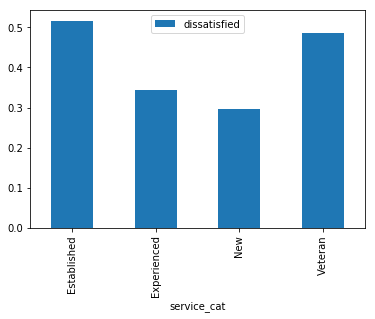

In [100]:
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
%matplotlib inline
dis_pct.plot(kind='bar')